In [1]:
from helpers import *
import warnings
warnings.filterwarnings("ignore")

/Users/chrisseo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


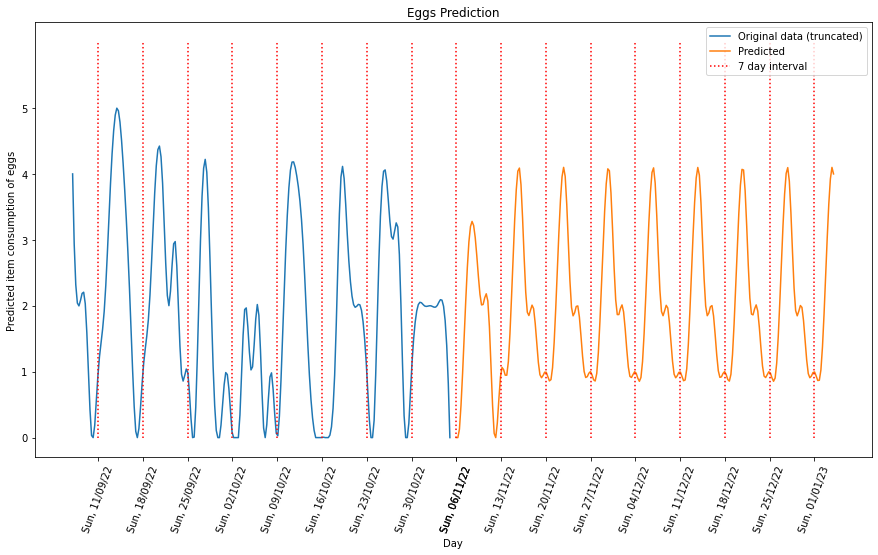

In [2]:
x,y = GEN_DATA(120, peak_consume=3, min_consume=0, noise_sd=1, testing=True)
num_predict = 60

# 60 points of training data, 60 for testing
# make a prediction of len 60 into the future

y_train, y_test = y[:len(y) - num_predict], y[len(y) - num_predict:]
yhat = SARIMA_PREDICT(y_train, [[1, 0, 0], [1, 1, 1, 7]], num_predict)

DISPLAY_DATA(date.today(), y_train, yhat, 'eggs');

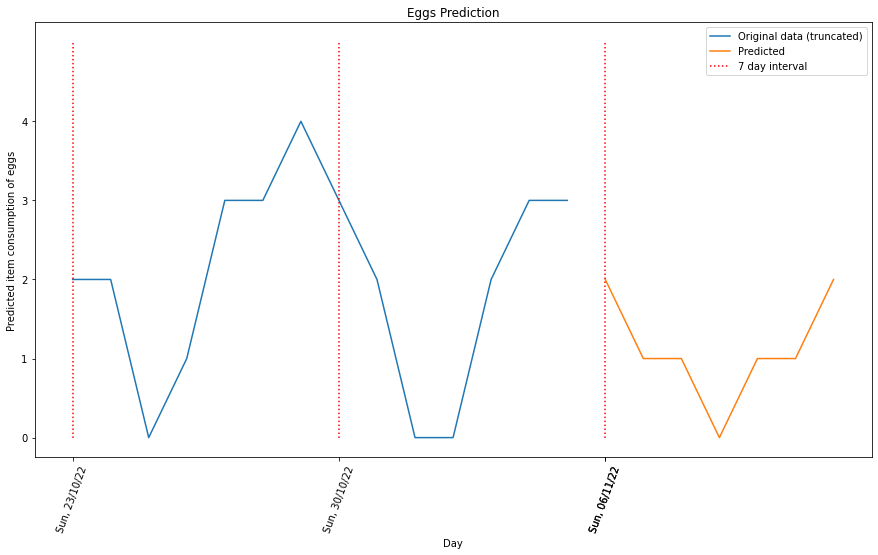

In [6]:
# show overlapping predictions on our test set
DISPLAY_DATA(date.today(), y_test, yhat, 'eggs');

In [4]:
'''
Testing accuracy by running 500 iterations of newly generated data on the model.
We found that params [1,0,0], [1,1,1,7] worked the best for our test data.
'''

def run_once(order_params, seasonal_order_params):
    x,y = GEN_DATA(200, 3.5, testing=True)
    num_predict = 40

    # split so last 40 points will be test, 80/20

    y_train, y_test = y[:len(y) - num_predict], y[len(y) - num_predict:]
    yhat = SARIMA_PREDICT(y_train, [order_params, seasonal_order_params], num_predict)
    
    return np.mean(abs(y_test - yhat))

order_params, seasonal_order_params = [1,0,0], [1,1,1,7]

totalErr = 0     
num_iters = 500
for _ in range(num_iters):
    totalErr += run_once(order_params, seasonal_order_params)

avgErr = totalErr / num_iters

print(f"Average error over {num_iters} iterations for this SARIMA configuration: {avgErr}")

Average error over 500 iterations for this SARIMA configuration: 0.7488500000000005


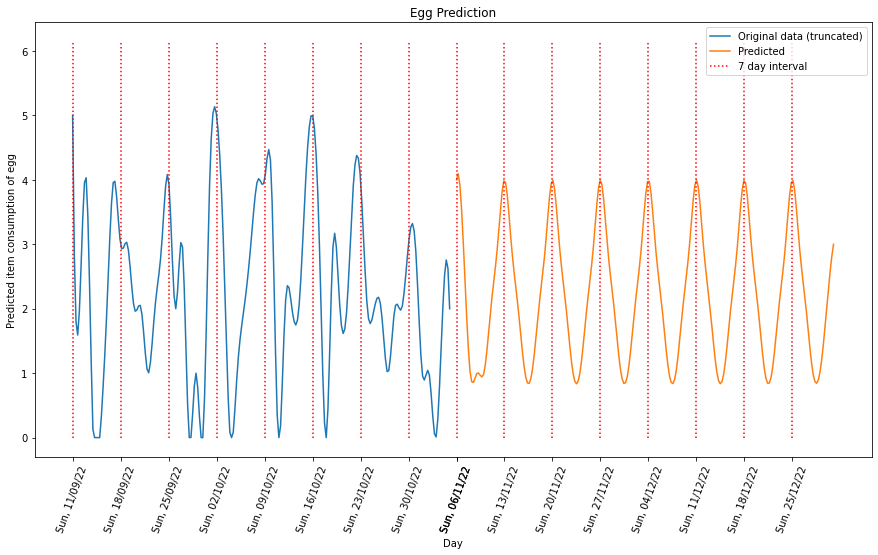

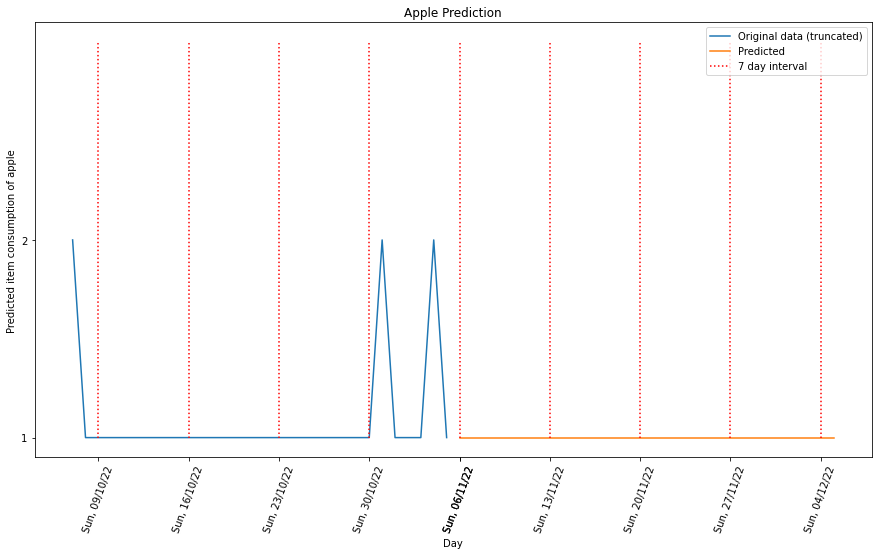

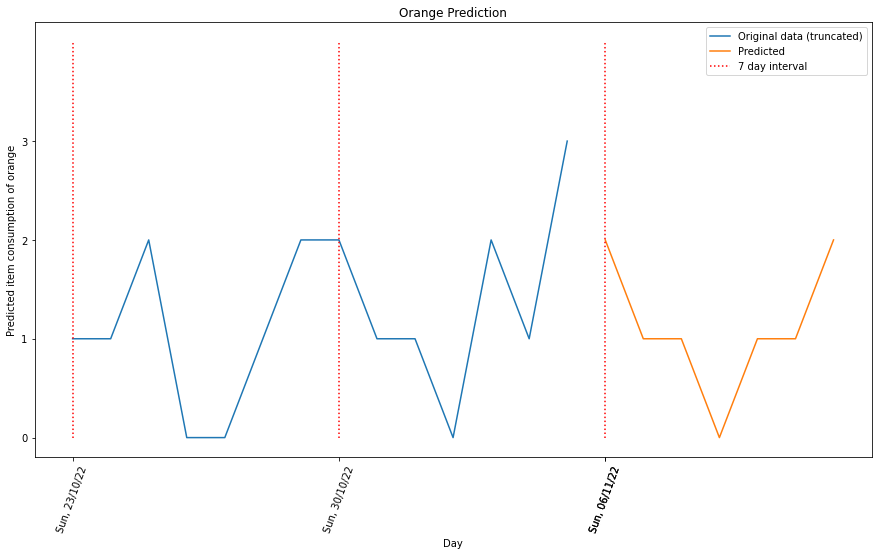

In [5]:
# Mock use cases and testing model.

now = date.today()

'''
Egg consumption, peaking on weekends
'''
_,y = GEN_DATA(days_ago=56, noise_sd=1, weekend_peak=True, peak_consume=3.5, min_consume=1)
yhat = SARIMA_PREDICT(y, orders=[[1, 0, 0], [1, 1, 1, 7]], num_predict=56)
item_name = 'egg'

DISPLAY_DATA(now, y, yhat, item_name=item_name);

'''
1 apple a day (keeps the doctor away), no periodicity. - SHOULD TREND FLAT
'''
_,y = GEN_DATA(days_ago=60, noise_sd=0.3, peak_consume=1, min_consume=1)
yhat = SARIMA_PREDICT(y, orders=[[1, 0, 0], [1, 1, 1, 7]], num_predict=30)
item_name = 'apple'

DISPLAY_DATA(now, y, yhat, item_name=item_name);

'''
Orange consumption, peaking mid-week
'''
_,y = GEN_DATA(days_ago=60, noise_sd=1, weekend_peak=False, peak_consume=2, min_consume=0)
yhat = SARIMA_PREDICT(y, orders=[[1, 0, 0], [1, 1, 1, 7]], num_predict=7)
item_name = 'orange'

DISPLAY_DATA(now, y, yhat, item_name=item_name);